Коэффициенты ассортативности и графики зависимости средней степени соседей от степени вершины для твиттера и ''6 degrees of Francis Bacon''

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.stats import spearmanr, pearsonr, kendalltau
from utils import parse_6dfb, parse_twitter, assort_plot

In [2]:
G = parse_6dfb()
G.number_of_nodes(), G.number_of_edges()

(15801, 171408)

In [3]:
def assort_koefs(graph):
    x, y = [], []
    for e1, e2 in graph.edges:
        x.append(graph.degree(e1))
        y.append(graph.degree(e2))
    print("pearson:", pearsonr(x, y))
    print("spearman:", spearmanr(x, y))
    print("kendall:", kendalltau(x, y))
    
    k = pearsonr(x, y)[0]
    n = len(x)
    k = pearsonr(x, y)[0]
    t = - np.abs(k * np.sqrt(n - 2) / np.sqrt(1 - k**2))
    print("p-value:", scipy.stats.t(df=n-1).cdf(t))
    
assort_koefs(G)

pearson: (-0.0824325788670432, 3.8742905328683475e-256)
spearman: SpearmanrResult(correlation=-0.08008084472857599, pvalue=8.327018765842944e-242)
kendall: KendalltauResult(correlation=-0.05557801779753881, pvalue=7.074403094602895e-257)
p-value: 1.9371227650500466e-256


(array([9006., 3471., 1535.,  648.,  412.,  236.,  124.,   98.,   48.,
         223.]),
 array([  0.,  15.,  30.,  45.,  60.,  75.,  90., 105., 120., 135., 150.]),
 <a list of 10 Patch objects>)

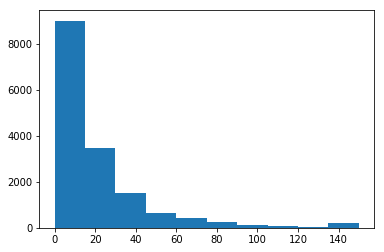

In [4]:
degs = np.array([G.degree(i) for i in G.nodes])
plt.hist(np.minimum(degs, 150))

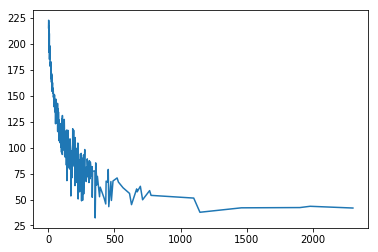

In [5]:
assort_plot(G)

In [6]:
from utils import parse_twitter
G_twitter = parse_twitter()
G_twitter.number_of_nodes(), G_twitter.number_of_edges()

(112416, 308927)

In [7]:
assort_koefs(G_twitter)

pearson: (0.36506181973472895, 0.0)
spearman: SpearmanrResult(correlation=0.4471889882297316, pvalue=0.0)
kendall: KendalltauResult(correlation=0.3244237583032209, pvalue=0.0)
p-value: 0.0


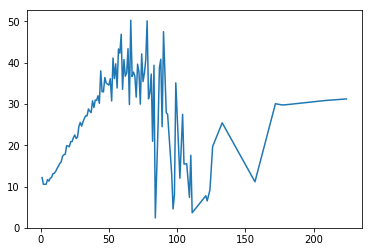

In [8]:
assort_plot(G_twitter)

(array([6815., 3879., 2075., 1174.,  655.,  408.,  245.,  167.,  100.,
         283.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

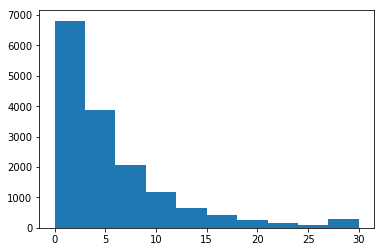

In [9]:
degs = np.array([G_twitter.degree(i) for i in G.nodes])
plt.hist(np.minimum(degs, 30))